## Image Resoultion and Noise Analysis

In [28]:
#import necessary libraries
import pandas as pd
import numpy as np
from PIL import Image
import os.path
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from skimage.restoration import estimate_sigma
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/nfshome/cb4102/.conda/envs/geoplot/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['hist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Quick Calculation of Diffraction Limit of the sensor for reference

In [66]:
lamb = 5.5e-7 #fixed lamda based on wavelength
dist = 0.00189 #distance value fixed based on camera apature

diffraction = np.arcsin(lamb / dist) #diffraction limit function, this function gives the value in radians 

print("The diffraction limit it radians is given by {} radians".format(round(diffraction,6)))

The diffraction limit it radians is given by 0.000291


### Quick analysis to see the number of pixels (resolution) in each image

In [29]:
#import the image files:
daytime = os.path.join('Manhattan - Daytime.JPG')
sunset = os.path.join('Manhattan - Sunset.JPG')

In [30]:
#open the daytime and image and check it's dimensions
daytime_img = Image.open(daytime)
d_width, d_height = daytime_img.size
print("Daytime Dimensions:", daytime_img.size, "Total pixels / resolution:", d_width * d_height)

Daytime Dimensions: (3264, 2448) Total pixels / resolution: 7990272


In [31]:
#open the sunset image and check it's dimensions
sunset_img = Image.open(sunset)
s_width, s_height = sunset_img.size
print("Sunset Dimensions:", sunset_img.size, "Total pixels / resolution:", s_width * s_height)

Sunset Dimensions: (3264, 2448) Total pixels / resolution: 7990272


Note: The images both have the same resolution with dimensions of (3264x2448), which makes sense given they are taken from the same camera and approximate location. Let's take a closer look at the images to see if we can make an assessment about the quality of resolution.

## Histogram Analysis

The histogram of an image shows us the graphical representation of an image's tonal distribution. More variation in the time series is indicative of more resolution in the image because larger tonal differences provide an indication of light contrast and detail

In [6]:
#calculate the RGB histogram and compare between the two images
total_daytime_pix = daytime_img.histogram()
total_sunset_pix = sunset_img.histogram()

Text(0.5, 1.0, 'Tonal Variation vs. Number of Pixels')

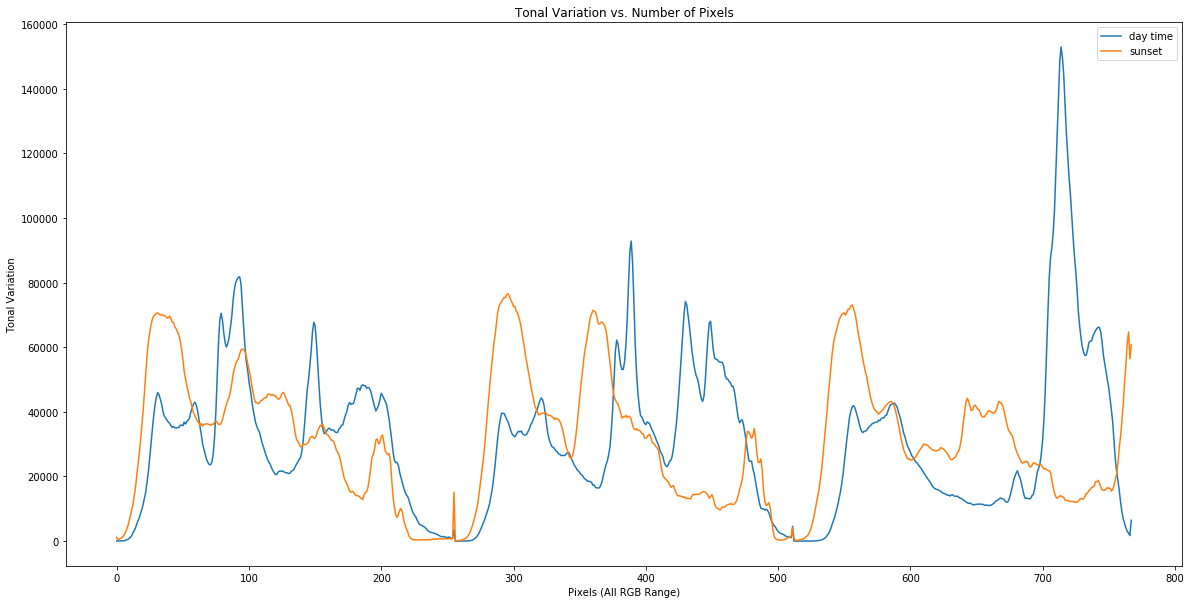

In [7]:
#visualize the histogram across RGB pixel space
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)

ax1.plot(total_daytime_pix,label='day time')
ax1.plot(total_sunset_pix, label='sunset')

plt.legend()
plt.xlabel("Pixels (All RGB Range)")
plt.ylabel("Tonal Variation")
plt.title("Tonal Variation vs. Number of Pixels")

Note: The larger standard deviation / volatility and range in the day time image suggestions higer variation and therefore higher image resolution than the sunset photo.

In [13]:
#convert RBG images to grey scale images for contrast comparison
daytime_gs = Image.open(daytime).convert('LA')
sunset_gs = Image.open(sunset).convert('LA')

Text(0.5, 1.0, 'Sunset')

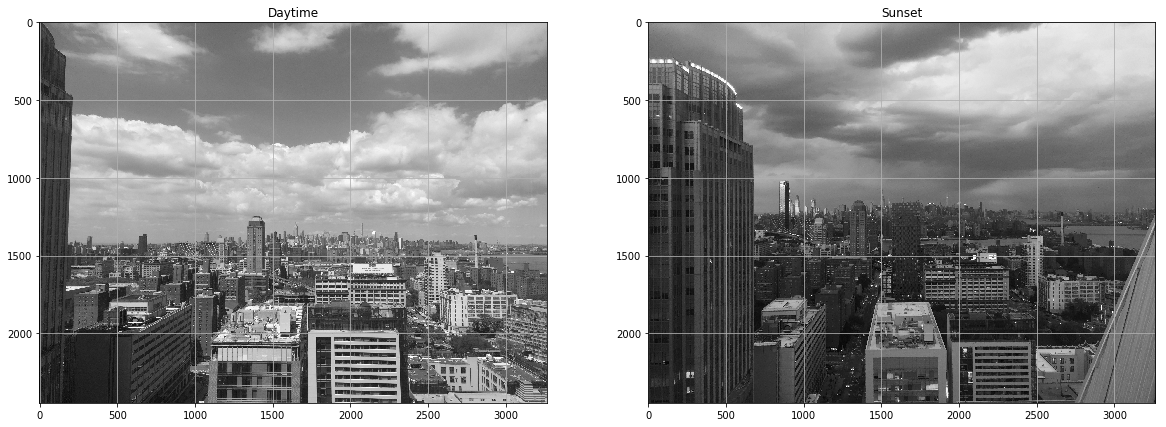

In [16]:
#plot the black and white photos
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax1.grid(True)
ax1.imshow(daytime_gs)
ax1.set_title("Daytime")

ax2 = fig.add_subplot(122)
ax2.imshow(sunset_gs)
ax2.grid(True)
ax2.set_title("Sunset")

(0, 111000)

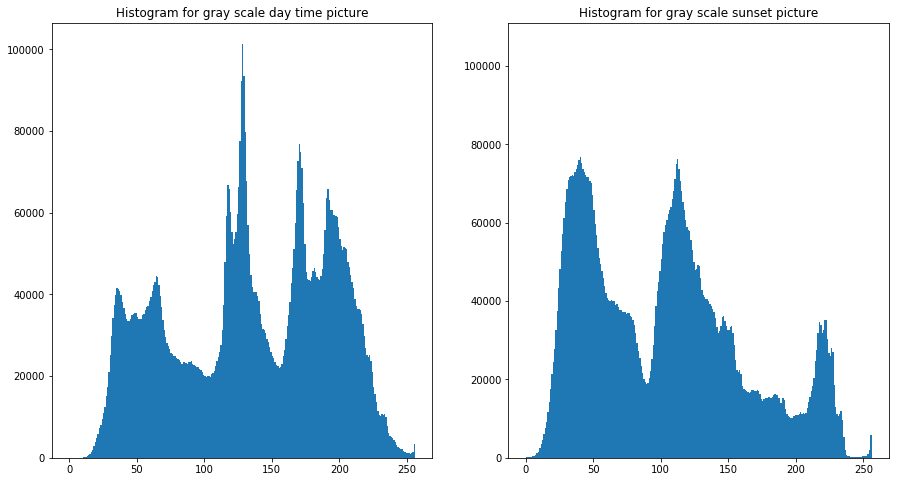

In [27]:
#for histogram calculations:
gray_dt = cv2.imread(daytime, cv2.IMREAD_GRAYSCALE)
gray_ss = cv2.imread(sunset, cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([gray_dt],[0],None,[256],[0,256])
hist = cv2.calcHist([gray_ss],[0],None,[256],[0,256])

fig = plt.figure(figsize=(15,8))

ax1 = fig.add_subplot(121)
ax1.hist(gray_dt.ravel(),256,[0,256])
ax1.set_title('Histogram for gray scale day time picture')

ax2 = fig.add_subplot(122)
ax2.hist(gray_ss.ravel(),256,[0,256])
ax2.set_title('Histogram for gray scale sunset picture')
ax2.set_ylim(0,111000)

Note: We can use a greyscale histogram to evaluate the contrast in the image. Higher contrast levels can indicate higher resolution. In this case there aren't stark differences between the images, however, the daytime photo does still appear to have a higher degree of contrast. High contrast would display in the histogram with a relatively even distribution across the pixel range.

In [75]:
#calculate the standard deviation of the histogram values - first converted to numpy arrays to access the std function

print("The standard deviation of tonal variation in the day-time photo: {}".format(round(np.array(total_daytime_pix).std(),2)))
print("The standard deviation of tonal variation in the sunset photo: {}".format(round(np.array(total_sunset_pix).std(),2)))

The standard deviation of tonal variation in the day-time photo: 24213.52
The standard deviation of tonal variation in the sunset photo: 20043.58


#### Histogram Analysis Conclusion

The RGC histogram from the daytime photo is showing larger variation, which suggests initially that it has a higher resolution than the sunset photo. The greyscale histogram binned from 0 to 256 suggests higher contrast (and therefore resolution) in the daytime photo, though the differences aren't significant. Using a simple standard deviation measure, the variation in the day-time photo is also higher. Note, that since the images are not identical the standard deviation measure is only approximate, since the exact range in each image is not exact.

## Visual Analysis of the Images

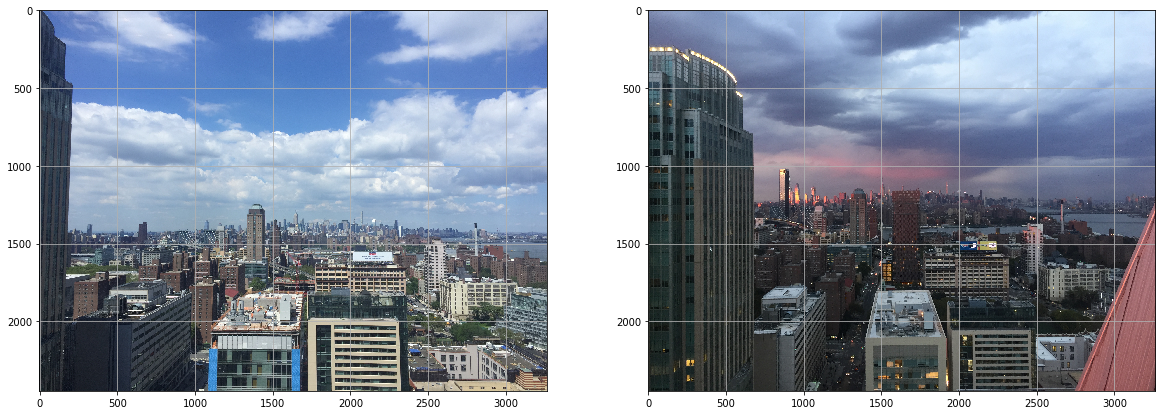

In [21]:
#Visualize the images side by side
img=mpimg.imread(daytime)
img2=mpimg.imread(sunset)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax1.grid(True)
ax1.imshow(img)

ax2 = fig.add_subplot(122)
ax2.imshow(img2)
ax2.grid(True)

## Evaluating the Image Zoomed In

Another way to evaluate resolution is to determine how many pixels it takes to see a particular object in each photo. For this we'll need to zoom in to a particular part of the pixel grid in each image and evaluate the resolution of a particular buidling or other object. Note since the images aren't taken at the same position, this is approximate. I've tried to adjust the pixel range so that the same number of pixels are in each zoomed image, but the range values are not identical because the picture aren't quite the same. We'll use the Empire State Building for image comparison

(1250, 1050)

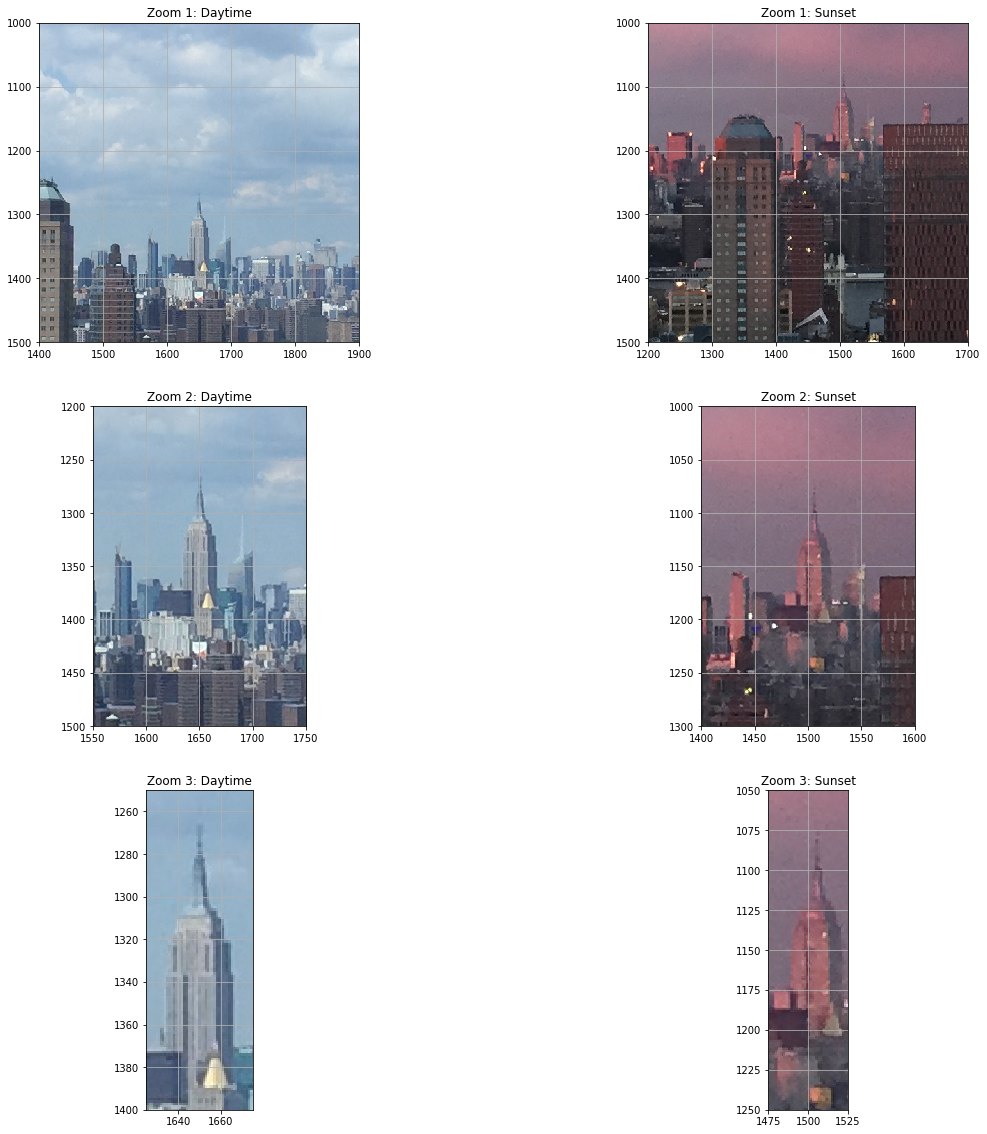

In [38]:
#Visualize the images side by side
img=mpimg.imread(daytime)
img2=mpimg.imread(sunset)

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(321)
ax1.imshow(img)
ax1.set_title("Zoom 1: Daytime")
ax1.grid(True)

ax1.set_xlim(1400, 1900)
ax1.set_ylim(1500,1000)

ax2 = fig.add_subplot(322)
ax2.imshow(img2)
ax2.set_title("Zoom 1: Sunset")
ax2.grid(True)

ax2.set_xlim(1200, 1700)
ax2.set_ylim(1500,1000)

ax3 = fig.add_subplot(323)
ax3.imshow(img)
ax3.set_title("Zoom 2: Daytime")
ax3.grid(True)

ax3.set_xlim(1550, 1750)
ax3.set_ylim(1500,1200)

ax4 = fig.add_subplot(324)
ax4.imshow(img2)
ax4.set_title("Zoom 2: Sunset")
ax4.grid(True)

ax4.set_xlim(1400, 1600)
ax4.set_ylim(1300,1000)

ax5 = fig.add_subplot(325)
ax5.imshow(img)
ax5.set_title("Zoom 3: Daytime")
ax5.grid(True)

ax5.set_xlim(1625, 1675)
ax5.set_ylim(1400,1250)

ax6 = fig.add_subplot(326)
ax6.imshow(img2)
ax6.set_title("Zoom 3: Sunset")
ax6.grid(True)

ax6.set_xlim(1475, 1525)
ax6.set_ylim(1250,1050)

Note, if we consider the empire state building, the farther we zoom in on the image, the more resolution is retained in the daytime photo vs. the sunset photo. Comparing zoom 2, we can still discern windows and detail in the building structure in the daytime photo whereas the sunset photo begins to degrade. In Zoom 3, the shape of the building in the sunset photo becomes difficult to see (i.e. where the building starts and ends, whereas in the daytime photo it is still fairly clear. Let's look at zoom 3 in more detail to quantify the resolution difference.

(1250, 1050)

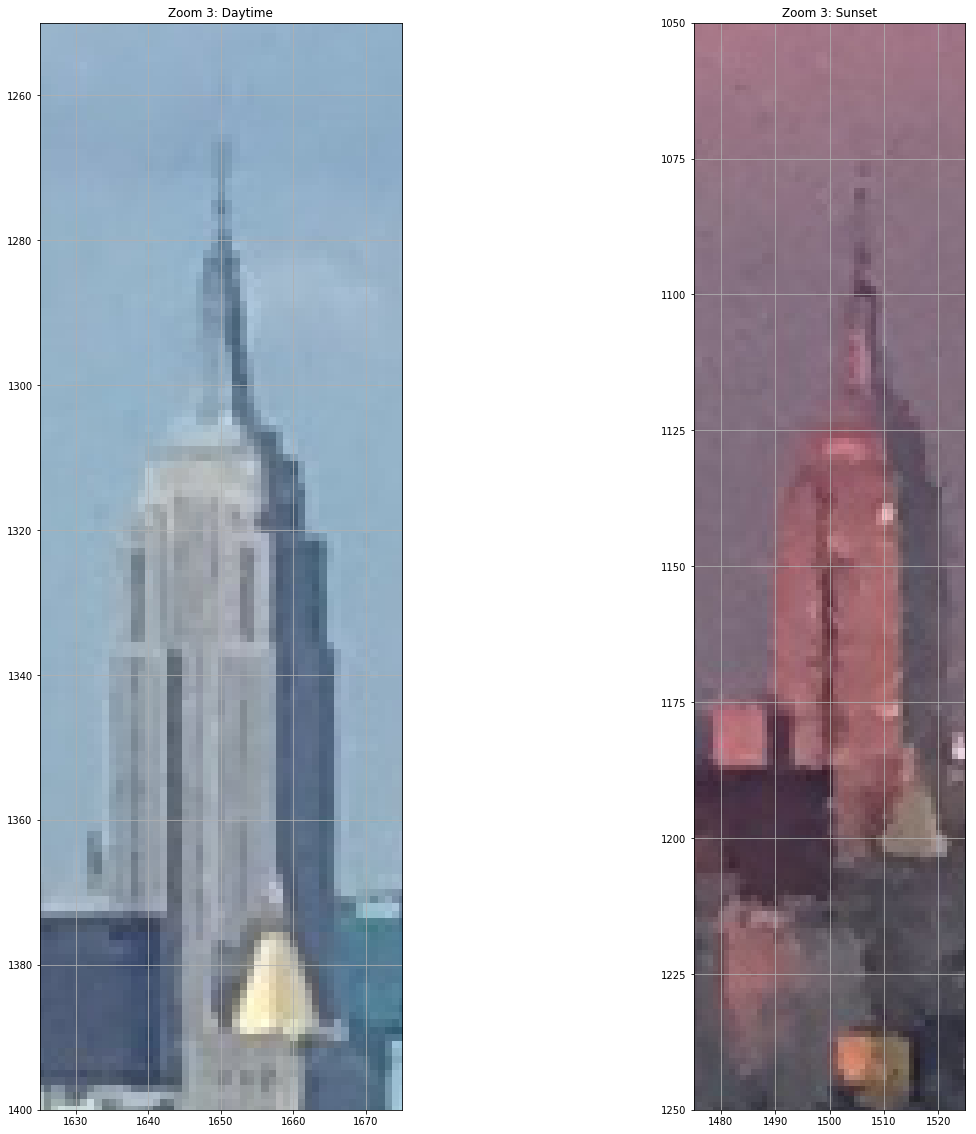

In [39]:
fig = plt.figure(figsize=(20,20))

ax5 = fig.add_subplot(121)
ax5.imshow(img)
ax5.set_title("Zoom 3: Daytime")
ax5.grid(True)

ax5.set_xlim(1625, 1675)
ax5.set_ylim(1400,1250)

ax6 = fig.add_subplot(122)
ax6.imshow(img2)
ax6.set_title("Zoom 3: Sunset")
ax6.grid(True)

ax6.set_xlim(1475, 1525)
ax6.set_ylim(1250,1050)

The empire state building is 424 ft wide and captured in the daytime image between 1635 to 1665 pixel. For the sunset image the pixel range is approximately 1485 to 1525. The same size building captured in a larger number of pixels implies a higher resolution because we will have more granularity in the image. This will result in more building width included in each pixel in the daytime image (see calculation below).

In [47]:
dt_ft_pix =  round(424 / (1665 - 1635),3)
ss_ft_pix = round(424 / (1525 - 1485),3)
print("daytime building ft per pixel: {}".format(dt_ft_pix))
print("sunset building ft per pixel: {}".format(ss_ft_pix))

daytime building ft per pixel: 14.133
sunset building ft per pixel: 10.6


## Quantifying Noise in the Image

Ex-ante we know that the sunset photo is lower resolution because of it's higher ISO and slower shutter speed, holding all other sensor factors constant. Since these sensor features will generate noise and reduce resolution, below we calculate the sigma estimate of noise in the images (assuming a gaussian distribution on the noise).

To try and adjust for this, the iphone automatically adjusts the ISO and the shutter speed (i.e. exposure time) to capture enough light in the image so it can be visualized. When shutter speed is longer, it can introduce noise into the photo through micro-vibrations as well as more light bouncing around the camera, which can reduce the resolution of the photo. In our case the shutter speed is 1/1236 sec. for the daytime photo vs. 1/30 sec. for the nighttime photo, which supports the conclusion that the daytime photo is higher resolution. 

In addition, the iphone adjust the ISO of the camera, which is a measure of light sensitivity (higher ISO = higher light sensitivity). ISO is a measure of a sensor's sensitivity to light and allows the camera to capture more light at a given f-stop and shutter speed. A higher ISO can result in what is typically described as a "grainy" image, which occurs because more noise is introduced into the image. This results is an image with reduced quality. In our photos the daytime photo is ISO-32 and the sunset photo is ISO-80 and as a result, the sunset image has more noise.

In [3]:
#estimate the actual noise in the image
def estimate_noise(image_path):
    '''function for estimating standard deviation / image noise'''
    img = cv2.imread(image_path)
    return estimate_sigma(img, multichannel=True, average_sigmas=True)

In [6]:
print("The day time photo noise (sigma) is {}".format(estimate_noise(daytime)))
print("The sunset photo noise (sigma) is {}".format(estimate_noise(sunset)))

The day time photo noise (sigma) is 0.7164722300562341
The sunset photo noise (sigma) is 0.8604160420418095


### Conclusion

The sunset photo has a lower resolution than the day time photo. There are a number of factors we can point to as evidence:

- The RRB and Greyscale histograms suggest that the daytime photo has more variation and higher levels of contrast
- The visual analysis of the photos, through various zoomed views, allow us to see higher resolution in the daytime photo
- The sunset photo has a higher ISO and slower shutter speed, with all other sensor features held constant
- The sunset photo has a higher image noise, as measured by standard deviation in the photos wavelets